#Analyzing Political Discourse on Reddit

Reddit is a very commonly used social media platform where users share their opinions and thoughts to discuss them with other people. Politics and news are one of the most popular topics that are discussed on Reddit. Reddit is very influential and allows easy data collection through their API, which are the reason why we chose Reddit as our data source. Reddit consists of lots of subreddits, which are discussions on certain topics. We have selected certain subreddits about politics for analysis.


Reddit provides a rich dataset for analyzing political discourse. By examining subreddits focused on political topics, we can gain insights into sentiment trends, information bubbles, and connections across user groups.

###Outline:

**Data Collection:** Demonstrates how to use PRAW (Python Reddit API Wrapper) to collect data from Reddit, with examples of filtering data by keywords, subreddits, or user attributes.

**Data Cleaning:** Shows techniques for cleaning and preparing the data to ensure it's ready for sentiment analysis, including handling missing data, removing irrelevant content, and standardizing formats.

**Sentiment Analysis:** Introduces sentiment analysis on cleaned data, covering tools like TextBlob or VADER to detect and classify sentiment (positive, negative, neutral) within posts or comments.

**Sentiment Visualizations:** Provides a visual representation of sentiment findings, using libraries like Matplotlib, Plotly, or Seaborn to create bar charts, pie charts, or time series plots, making it easier to spot patterns.

**Word Cloud Visualization:** Adds a visual representation of frequently used terms within each subreddit, highlighting common topics and the relative importance of keywords in political discourse.

**Subreddit Word Similarities (Heatmap):** Shows a heatmap of cosine similarities between subreddits, providing insight into thematic overlaps and ideological connections across different political communities on Reddit.

**Information Bubbles:** Explores how to identify and interpret information bubbles within the dataset, with explanations of clustering techniques or user-group analysis to reveal echo chambers or polarized discourse.


## Data Collection

To collect data from REDDIT, follow these steps:
1. Click this link: https://www.reddit.com/prefs/apps and make sure you are logged in to your account.
2. Navigate to the apps tab and create a new app.
3. Name the app whatever you see fit, choose script, and add a redirect uri such as http://localhost:8080.
4. Click the box to verify you are not a robot and click create app.

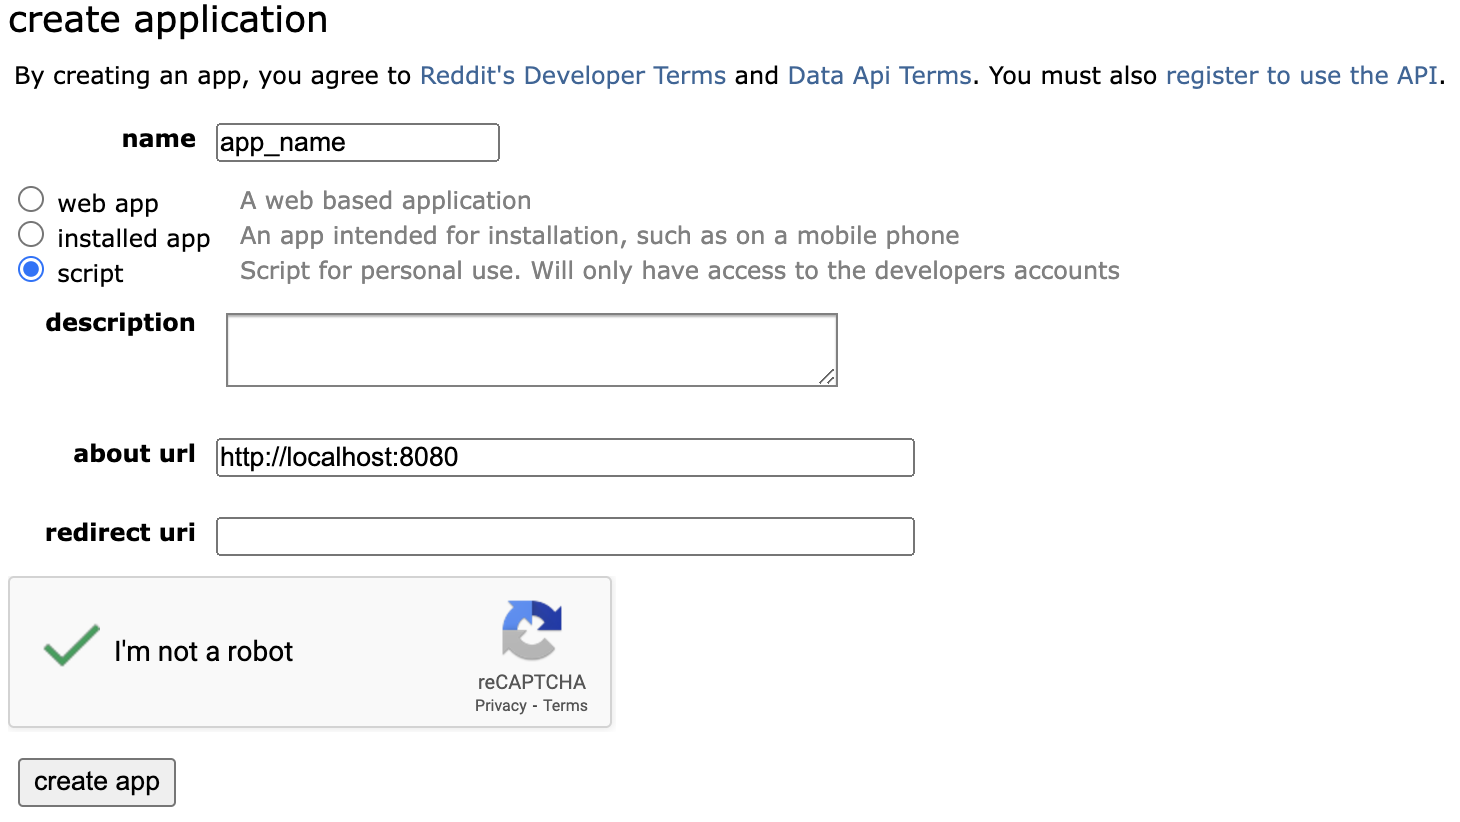

In [ ]:
from IPython.display import Image, display

# Display the Reddit app creation page
display(Image('/content/appsetup.png'))



5. Now click edit on the bottom left of your app. The title should be displayed at the top and below it it should be written "personal use script". Right below that, you will see a string. This is your client_id which you will substitute into the code later. The secret should also be displayed on this screen. You will need to substitute that too.


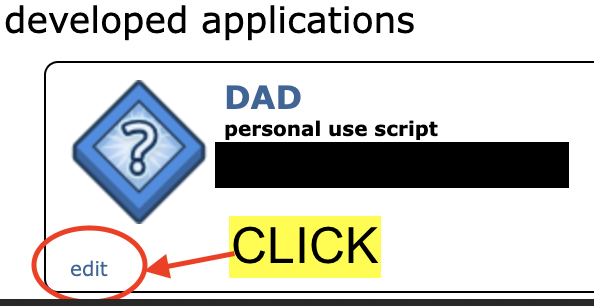

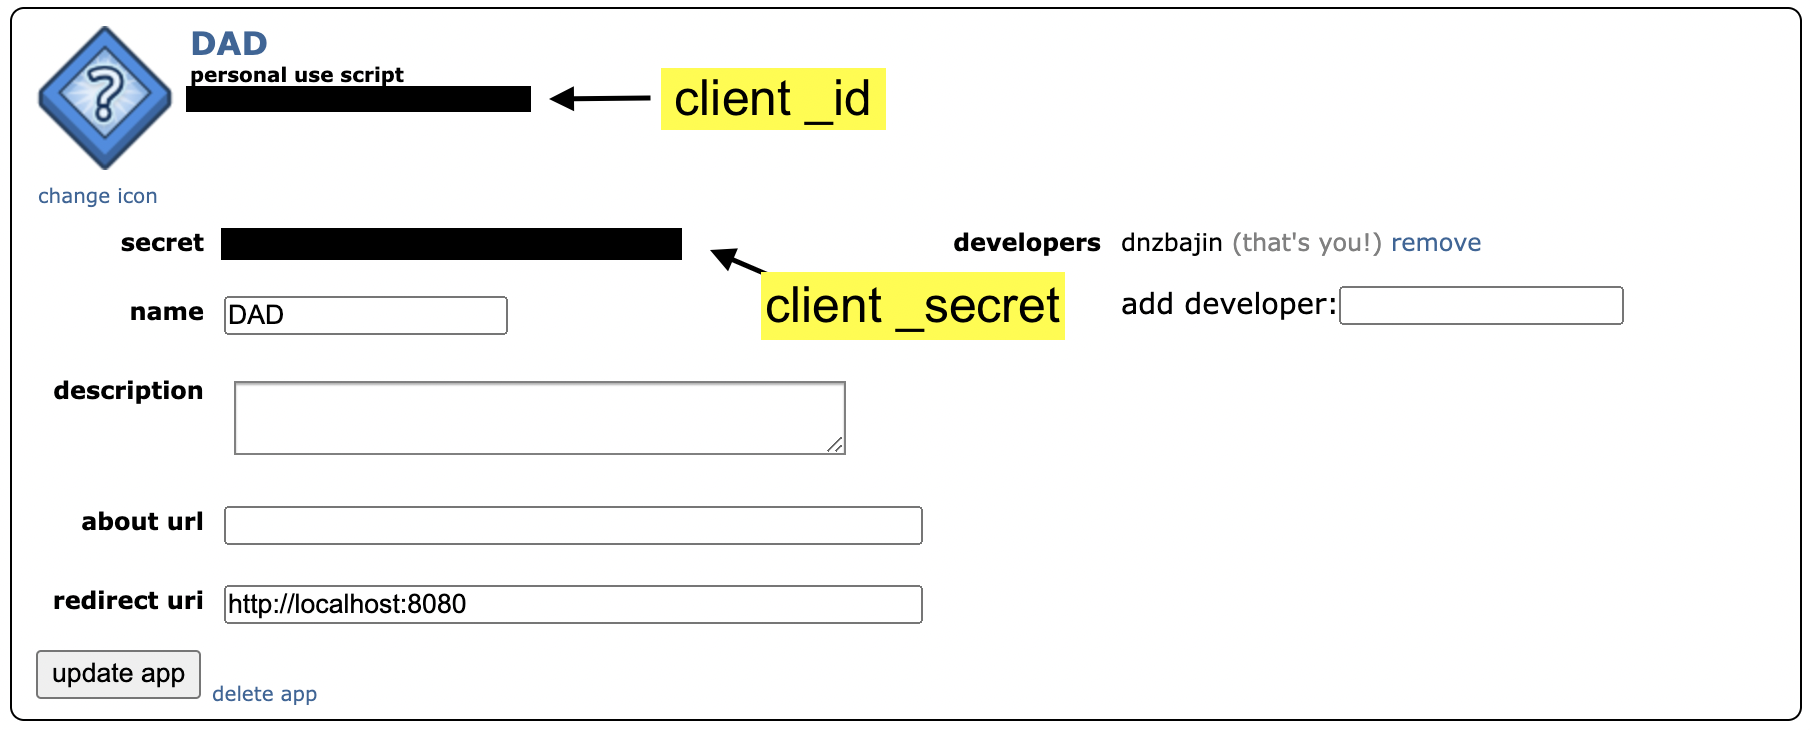

In [ ]:
# Display the location of the edit button
display(Image('/content/editbutton.png'))

# Display the location of the client_id and secret
display(Image('/content/clientidandsecretdisplay.png'))

6. Run the code cells below to install all packages and libraries you will need. On the third cell, substitute the variables with your client_id, client_secret, and user_agent before you run it.

In [ ]:
!pip install praw pandas TextBlob matplotlib vaderSentiment emoji nltk vaderSentiment matplotlib seaborn wordcloud networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.3 MB/s eta 0:00:00


In [ ]:
import re
import random
import time
from itertools import combinations

import praw  # Reddit API Wrapper for data collection

# For file handling
import csv  # For reading and writing CSV files
from google.colab import drive  # Mount Google Drive for file storage
import os  # File and directory handling

# For Data manipulation and visulizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Colormap utilities
from matplotlib.colors import Normalize, ListedColormap, LinearSegmentedColormap  # Colormap customization

# For text cleaning
import string
import emoji
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords
nltk.download('stopwords')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Sentiment analysis

from wordcloud import WordCloud  # Generate word cloud visualizations
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text data to numerical features
from sklearn.metrics.pairwise import cosine_similarity  # Measure similarity

import networkx as nx  # Graph analysis and visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Download the drive folder from the link below and upload it to your drive to perform analysis on it.
https://drive.google.com/drive/folders/1aCllDE2yBxiWgYMmlQkpJ8U3kww5_eLr?usp=share_link

Make sure to mount Google Drive (run the cell below) when you make a copy of the folder that contains the data in your Google Drive. (link to drive: https://drive.google.com/drive/folders/1aCllDE2yBxiWgYMmlQkpJ8U3kww5_eLr?usp=share_link)

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive



This code uses PRAW to connect to the Reddit API and extract the top posts from a specified subreddit (e.g., politicaldiscussion), saving key details like title, score, and comments into a CSV file.

In [ ]:
# REVIEWERS DON'T RUN THIS CELL (IT TAKES A REALLY LONG TIME TO RUN,
# WE ALREADY PROVIDED THE COLLECTED DATA IN THE DRIVE FOLDER LINKED ABOVE)

# Initialize PRAW with your Reddit API credentials
# Create a Reddit instance (substitute your client id, secret, and agent(replace "dnzbajin" with your username))
reddit = praw.Reddit(
    client_id='xxxx',
    client_secret='xxxx,
    user_agent='my_reddit_script_v1.0 by /u/dnzbajin'
)

# Choose a subreddit
subreddit = reddit.subreddit('politicaldiscussion')  # Change this to any subreddit you're interested in and change the name of the csv file to save it to a different csv

# Open/create a CSV file to save the data
with open('reddit_data.csv', mode='w', newline='', encoding='utf-8') as csv_file:
    columns = ['title', 'score', 'id', 'url', 'comms_num', 'created', 'body']
    writer = csv.DictWriter(csv_file, fieldnames=columns)

    writer.writeheader()

    # Fetch the top posts in the subreddit (can change to 'hot', 'new', etc.)
    for entry in subreddit.top(limit=10000):  # Adjust limit as needed
        writer.writerow({
            'title': entry.title,
            'score': entry.score,
            'id': entry.id,
            'url': entry.url,
            'comms_num': entry.num_comments,
            'created': entry.created,
            'body': entry.selftext
        })


This script collects data for analyzing information bubbles by targeting six subreddits, retrieving active users, and sampling 1,200 of them to extract their post histories. Each user's posts are saved in individual CSV files, ensuring organized data storage for further analysis.

In [ ]:
# REVIEWERS DON'T RUN THIS CELL (IT TAKES A REALLY LONG TIME TO RUN,
# WE ALREADY PROVIDED THE COLLECTED DATA IN THE DRIVE FOLDER LINKED ABOVE)

# Data collection

# Create a Reddit instance (substitute your client id, secret, and agent(replace "dnzbajin" with your username))
reddit = praw.Reddit(
    client_id='xxxx',
    client_secret='xxxx',
    user_agent='my_reddit_script_v1.0 by /u/dnzbajin'
)

# Define the target subreddits
subreddits = ["politics", "KamalaHarris", "trump", "Conservative", "Liberal", "conspiracy"]

# Collect a set of users who have submitted posts in the target subreddits
user_set = set()
user_limit_per_subreddit = 200  # Number of unique users to retrieve per subreddit (adjust based on API limits)

for sub in subreddits:
    try:
        subreddit = reddit.subreddit(sub)
        for submission in subreddit.new(limit=500):  # Get recent posts only
            if submission.author:  # Ensure the post has an author
                user_set.add(submission.author.name)
    except Exception as e:
        print(f"Error fetching users from {sub}: {e}")
sample_users = random.sample(list(user_set), min(len(user_set), 1200))

# Create a folder to store user CSV files
if not os.path.exists("user_data"):
    os.makedirs("user_data")

# For each user, retrieve only their main posts (submissions)
for user_name in sample_users:
    try:
        user = reddit.redditor(user_name)
        user_posts = []

        # Retrieve up to 1000 submissions per user to get a representative history
        for submission in user.submissions.new(limit=1000):
            user_posts.append({
                "title": submission.title,
                "selftext": submission.selftext,
                "subreddit": submission.subreddit.display_name,
                "created_utc": submission.created_utc,
                "score": submission.score,
                "url": submission.url
            })

        # Save user's posts to a CSV file
        csv_filename = f"user_data/{user_name}.csv"
        with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=["title", "selftext", "subreddit", "created_utc", "score", "url"])
            writer.writeheader()
            writer.writerows(user_posts)

        # Add a delay to avoid hitting Reddit's API rate limit
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching posts for user {user_name}: {e}")

print("Data collection complete!")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

KeyboardInterrupt: 

In [ ]:
# REVIEWERS DON'T RUN THIS CELL (IT TAKES A REALLY LONG TIME TO RUN,
# WE ALREADY PROVIDED THE COLLECTED DATA IN THE DRIVE FOLDER LINKED ABOVE)

# Data collection

# Path to the folder containing individual CSV files in Google Drive
input_folder = "/content/drive/My Drive/collected_data/user_data"
output_file = "/content/drive/My Drive/collected_data/all_users_combined.csv"

# Ensure the input folder exists
if not os.path.exists(input_folder):
    print(f"Input folder '{input_folder}' not found. Please ensure the path is correct.")
else:
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    # Open the output CSV file in Google Drive
    with open(output_file, "w", newline="", encoding="utf-8") as outfile:
        writer = None
        for filename in csv_files:
            user_name = os.path.splitext(filename)[0]  # Get the filename without the .csv extension
            with open(os.path.join(input_folder, filename), "r", encoding="utf-8") as infile:
                reader = csv.DictReader(infile)
                if writer is None:
                    # Add 'user' to the fieldnames for the header
                    fieldnames = reader.fieldnames + ["user"]
                    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
                    writer.writeheader()
                # Write the contents of each individual file, adding 'user' column to each row
                for row in reader:
                    row["user"] = user_name  # Add the username to the row
                    writer.writerow(row)

    print(f"All CSV files have been combined into {output_file} with 'user' column added.")

MessageError: Error: credential propagation was unsuccessful

## Cleaning Reddit Data
If you were to observe the Reddit data, you would find that there are uncommon characters, emojis, punctuation, URLs, and stopwords which create noise that could distort our analysis. The cells below clean the data from these elements.

**How this code works:**
1. Load your reddit data using pandas function ```read_csv```.
2. Pass in your data through ```clean_text``` function which filters any unnecessary characters in the main text of the reddit post (columns:```["title", "body"]```).
3. Save the newly filtered data using ```to_csv```.



In [ ]:
# Load your data
df_demo = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/reddit_democrats_data.csv')
df_rep = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/reddit_republican_data.csv')
df_kam = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/reddit_kamalaharris_data.csv')
df_trump = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/reddit_trump_data.csv')
df_political = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/reddit_politicaldiscussion_data.csv')
df_all_user = pd.read_csv("/content/drive/MyDrive/cs123_DAD/all_users_combined.csv")

In [ ]:
# Running this cell might take 30 seconds or so.
sw_nltk = stopwords.words('english')
def clean_text(df, columns):
    if isinstance(columns, str):
        columns = [columns]

    translator = str.maketrans('', '', string.punctuation)
    unwanted_chars = ["’", "…", "“", "”", "—"]

    for column in columns:
        # Lowercase each string
        df[column] = df[column].apply(lambda x: x.lower() if isinstance(x, str) else x)

        # Remove stopwords
        df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word not in sw_nltk]) if isinstance(x, str) else x)

        # Remove emojis
        df[column] = df[column].apply(lambda x: emoji.replace_emoji(x, '') if isinstance(x, str) else x)

        # Remove URLs
        df[column] = df[column].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

        # Remove punctuation
        df[column] = df[column].str.translate(translator)

        # Remove unwanted characters
        for char in unwanted_chars:
            df[column] = df[column].str.replace(char, "", regex=False)

    return df


# Clean the 'title' and 'body' columns for each dataframe
clean_df_demo = clean_text(df_demo, ['title', 'body'])
clean_df_rep = clean_text(df_rep, ['title', 'body'])
clean_df_kam = clean_text(df_kam, ['title', 'body'])
clean_df_trump = clean_text(df_trump, ['title', 'body'])
clean_df_political = clean_text(df_political, ['title', 'body'])
clean_df_all_user = clean_text(df_all_user, ['title'])


In [ ]:
# Upload cleaned files to Google Drive folder.
clean_df_demo.to_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_democrats_data.csv', index=False)
clean_df_rep.to_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_republican_data.csv', index=False)
clean_df_kam.to_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_kamalaharris_data.csv', index=False)
clean_df_trump.to_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_trump_data.csv', index=False)
clean_df_political.to_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_politicaldiscussion_data.csv', index=False)
clean_df_all_user.to_csv('/content/drive/MyDrive/cs123_DAD/all_users_combined_CLEAN.csv', index=False)

##Sentiment Analysis

Sentiment analysis is the process of determining whether a piece of text expresses a positive, negative, or neutral emotion or opinion. We will be performing sentiment analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner). The CSV file generated with this code will have title, compound sentiment score, negative, positive, and neutral columns. The title column is the text we will be analyzing. The analysis will classify the sentiment of the post as negative, positive, or neutral.

### SentimentIntensityAnalyzer (from nltk.sentiment.vader)

**Purpose:** The NLTK library contains the VADER sentiment analysis tool that is used which will be used to analyze the sentiment of the text data.

**Functions Used:**

  `polarity_scores`: This method returns a dictionary with sentiment scores for a given text. This dictionary contains key-value pairs:

      1. `compound`: This score ranges from -1 to 1, where a score closer to -1 means more negative, closer to 1 meaning more positive, and closer to 0 meaning more neutral or mixed.
      2. `positive`: The percentage of text that expresses positive sentiment.
      3. `neutral`: The percentage of text that expresses neutral sentiment.
      4. `negative`: The percentage of text that expresses negative sentiment.

**How this code works:**

  1. File Reading: The code opens the input CSV file using the `csv.DictReader` method, which reads each row and converts it into a dictionary using the column headers as keys.
  2. Sentiment Analysis: The code uses `SentimentIntensityAnalyzer` to analyze the sentiment of the `title` column for each row. You can replace `row['title']` with any other text column you may have in your input CSV file.
  3. Appending Sentiment Data: The resulting sentiment scores (positive, negative, neutral, compound) are added to each row of the CSV.
  4. The sentiment scores are written to a new CSV file using `csv.DictWriter`.
          

In [ ]:
# Open the input CSV file containing Reddit data (replaced with desired dataset path)
input_file = '/content/drive/MyDrive/cs123_DAD/all_users_combined_CLEAN.csv'  # Replace this with the path to your cleaned Reddit CSV file path
output_file = '/content/drive/MyDrive/cs123_DAD/all_users_combined_sentiment.csv'  # This will be the output CSV with sentiment analysis

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Open the cleaned CSV file and create a new CSV for the results
with open(input_file, mode='r', encoding='utf-8') as csv_in, open(output_file, mode='w', newline='', encoding='utf-8') as csv_out:
    reader = csv.DictReader(csv_in)

    # Define the column headers for the output CSV
    fieldnames = reader.fieldnames + ['compound', 'positive', 'neutral', 'negative']  # Add sentiment columns
    writer = csv.DictWriter(csv_out, fieldnames=fieldnames)

    # Write the header to the output file
    writer.writeheader()

    # Process each row in the input CSV
    for row in reader:
        # Perform VADER sentiment analysis on the 'body' text (replace with 'title' for title analysis)
        sentiment = analyzer.polarity_scores(row['title'])

        # Append sentiment scores to the row
        row['compound'] = sentiment['compound']
        row['positive'] = sentiment['pos']
        row['neutral'] = sentiment['neu']
        row['negative'] = sentiment['neg']

        # Write the updated row to the output CSV
        writer.writerow(row)

print("Sentiment analysis completed and saved to " + output_file)

Sentiment analysis completed and saved to /content/drive/MyDrive/cs123_DAD/all_users_combined_sentiment.csv


## Sentiment Analysis Visualizations


#### **Plot 1: Distribution of Compound Sentiment Scores:**

  A histogram is created to visualize the distribution of the compound sentiment scores using `sns.histplot()`. A kernel density estimate (KDE) is also plotted to smooth the histogram.
  The plot is saved as compound_sentiment_distribution.png and displayed.


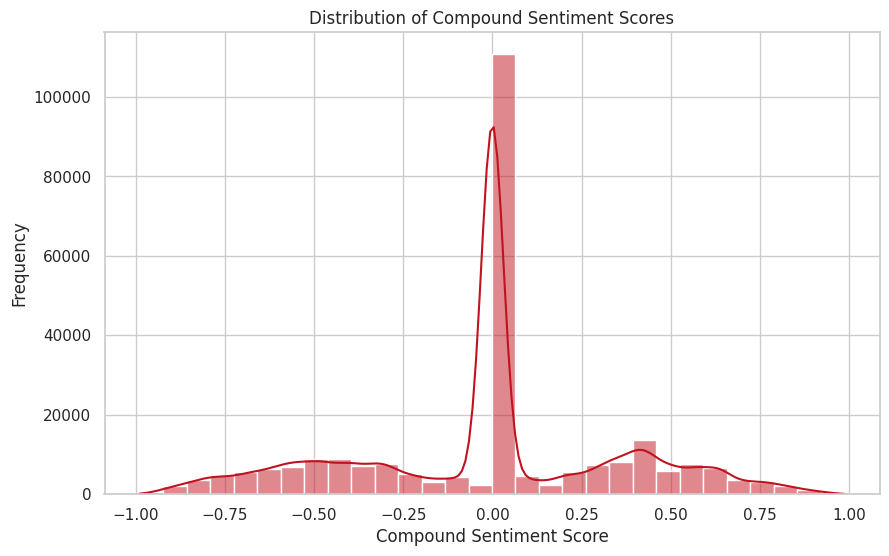

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/drive/My Drive/cs123_DAD/all_users_combined_sentiment.csv')

# Set the style for the plots
sns.set(style="whitegrid")

# Define the custom color palette
custom_colors = ['#FDF0D5', '#C1121F', '#669BBC']

# Plot 1: Distribution of Compound Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=30, kde=True, color=custom_colors[1])  # Using first color from custom palette
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.savefig('compound_sentiment_distribution.png')
plt.show()

**Create a New 'Sentiment' Column:** A new column named 'Sentiment' is created in the DataFrame based on the compound sentiment score. The sentiment is categorized as:
'Positive' if the score is greater than 0.
'Negative' if the score is less than 0.
'Neutral' if the score is 0.


In [ ]:
# Create a 'Sentiment' column based on 'compound' score for categorizing as Positive, Neutral, or Negative
df['Sentiment'] = df['compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count each sentiment type
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

#### **Plot 2: Sentiment Breakdown (Bar Plot):**

The sentiment counts are calculated using `value_counts()`, which counts how many positive, negative, and neutral posts there are.
A bar plot is created using `sns.barplot()` to visualize the sentiment breakdown.
The plot is saved as sentiment_barplot.png and displayed.

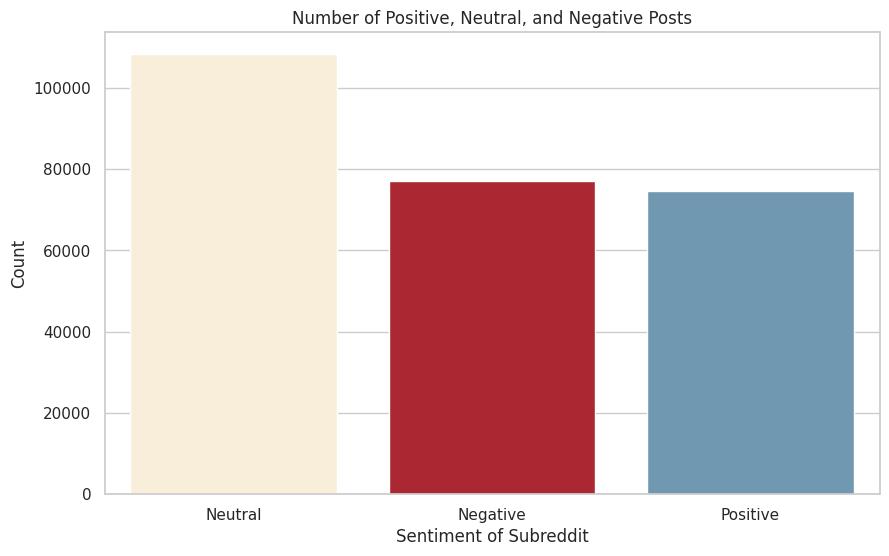

In [ ]:
# Plot 2: Sentiment Breakdown (Positive, Neutral, Negative) as a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', hue='Sentiment', palette=custom_colors[:3], dodge=False, legend=False)  # Using first three colors
plt.title('Number of Positive, Neutral, and Negative Posts')
plt.ylabel('Count')
plt.xlabel('Sentiment of Subreddit')
plt.savefig('sentiment_barplot.png')
plt.show()

#### **Plot 3: Sentiment Proportions (Pie Chart):**

  A pie chart is created using `plt.pie()` to show the proportion of each sentiment category (neutral, negative, positive). The sizes are calculated as the mean of the respective sentiment columns (neutral, negative, positive).
  The plot is saved as sentiment_pie_chart.png and displayed.

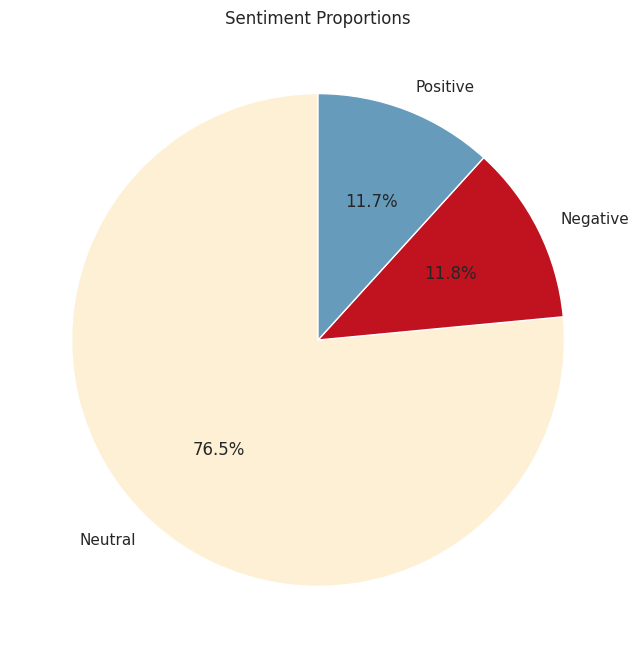

In [ ]:
# Plot 3: Sentiment Pie Chart (Proportion of Sentiment Categories)
plt.figure(figsize=(8, 8))
labels = ['Neutral','Negative','Positive']
sizes = [df['neutral'].mean(), df['negative'].mean(), df['positive'].mean()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=custom_colors[:3], startangle=90)  # Using last three colors
plt.title('Sentiment Proportions')
plt.savefig('sentiment_pie_chart.png')
plt.show()

## WordClouds
Word mapping is a technique used to visualize and analyze the frequency and relationships of words within a body of text. This provides a quick, high-level view of common terms and potential biases within each political group.

**Purpose**: To visually convey key terms associated with each subreddit through wordclouds.

**How the code works:**

1. Load the filtered data and combine the 'title' and 'body' of each subreddit into one string (```' '.join(df_demo['title'].astype(str) + ' ' + df_demo['body'].fillna(''))```).
2. Use ```WordCloud()``` to create a wordcloud visualization and display the results using ```imshow()```.

In [ ]:
# Load your data
df_demo = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_democrats_data.csv')
df_rep = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_republican_data.csv')
df_kam = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_kamalaharris_data.csv')
df_trump = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_trump_data.csv')
df_political = pd.read_csv('/content/drive/MyDrive/cs123_DAD/All_Subreddits/filter_reddit_politicaldiscussion_data.csv')

In [ ]:
# Combine the text for each subreddit
combined_texts = {
    'Democrat': ' '.join(df_demo['title'].astype(str) + ' ' + df_demo['body'].fillna('')),
    'Republican': ' '.join(df_rep['title'].astype(str) + ' ' + df_rep['body'].fillna('')),
    'Kamala Harris': ' '.join(df_kam['title'].astype(str) + ' ' + df_kam['body'].fillna('')),
    'Trump': ' '.join(df_trump['title'].astype(str) + ' ' + df_trump['body'].fillna('')),
    'Political Discussion': ' '.join(df_political['title'].astype(str) + ' ' + df_political['body'].fillna(''))
}

A wordcloud is created using ```WordCloud()``` to visualize the frequency of common words. For this example we made a wordcloud for the democrat subreddit (```combined_texts["Democrat"]```). Note that you can only visualize one subreddit at a time, unless you decide to combine multiple subreddits together.

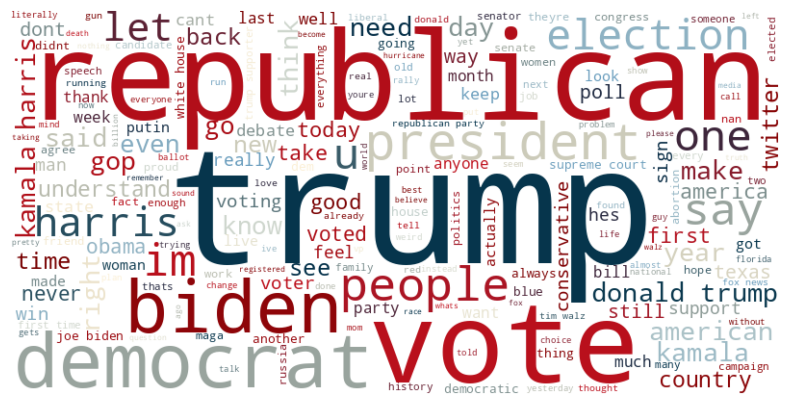

In [ ]:
# Define the custom color palette
colors = ["#780000", "#C1121F", "#003049", "#FDF0D5", "#669BBC"]
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", colors, N=256)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_cmap).generate(combined_texts["Democrat"])

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

##Word Similarities Between Subreddits

Understanding the similarities in words and phrases between these subreddits gives us valuable insights into the thematic overlaps and ideological connections shared by different political communities on Reddit.

**Purpose**:
To quantify and visualize word similarities through cosine similarities and heatmaps.

First we need to vectorize the combined text for each subreddit using TF-IDF, which captures the importance of words relative to each subreddit. Next, by calculating cosine similarity between these TF-IDF vectors, we get a measure of similarity. Finally, this similarity can be visualized in a heatmap to highlight how closely related the subreddits are in terms of their language and content.

**How this code works:**
1. All subreddit data is vectorized (```TfidfVectorizer()```) and normalized (```fit_transform()```) so it can be passed into ```cosine_similarity()``` to calculate the word similarities between subreddits.
2. Each subreddit some have a corresponding similar rating to each subreddit, using ```pd.DataFrame()``` we can organize these ratings into a structured format that makes it easier to visualize and analyze the relationships between subreddits.
3. Use ```sns.heatmap()``` to visualize correlations between subreddits.








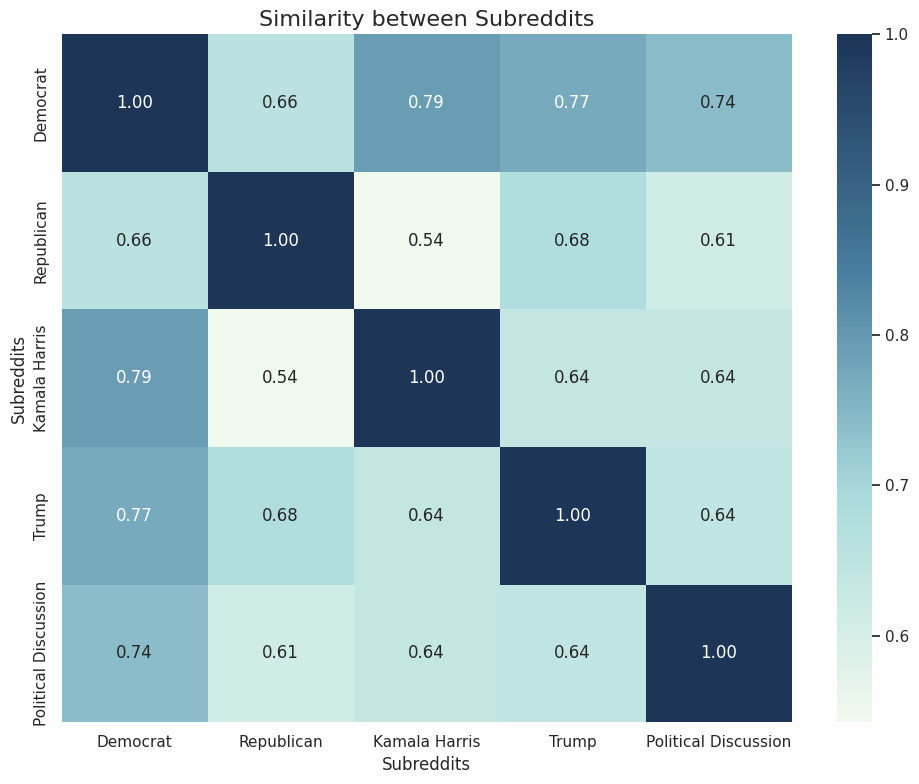

In [ ]:
# Vectorize and Normalize the Text
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(combined_texts.values())

# Calculate Similarity Between Subreddits
cosine_sim = cosine_similarity(tfidf_matrix)

# Convert Similarity to a DataFrame For Visualization
cosine_sim_df = pd.DataFrame(cosine_sim, index=combined_texts.keys(), columns=combined_texts.keys())

# Define custom colors
custom_colors = ['#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap=custom_cmap, fmt=".2f")

plt.title("Similarity between Subreddits", fontsize=16)
plt.xlabel("Subreddits", fontsize=12)
plt.ylabel("Subreddits", fontsize=12)
plt.tight_layout()
plt.savefig('word_similarities_subreddits.png')
plt.show()


##Information Bubbles##

Information bubbles are formed when groups reinforce their views without exposure to opposing perspectives. By analyzing shared user interactions across political subreddits, we identify and visualize these bubbles using graph-based methods.

##Edge List Construction
**Purpose:**

To quantify user overlaps between subreddits and represent them as connections in a graph.

**How this code works:**

1. Data Filtering: Focus on six subreddits (politics, KamalaHarris, trump, Conservative, Liberal, conspiracy).
2. User Mapping: Map each subreddit to its unique user set.
3. Overlap Calculation: Compute the intersection (shared users) between subreddit pairs.
4. Edge List Creation: Store overlaps as:
  * Subreddit1, Subreddit2: Connected subreddits.
  * Weight: Number of shared users.


In [ ]:
df = pd.read_csv("/content/drive/My Drive/cs123_DAD/all_users_combined.csv")

# Filter data to only the political subreddits
political_subreddits = ["politics", "KamalaHarris", "trump", "Conservative", "Liberal", "conspiracy"]
df = df[df["subreddit"].isin(political_subreddits)]

# Map each subreddit to its users using a dictionary
subreddit_users = {sub: set(users) for sub, users in df.groupby("subreddit")["user"]}
edges = []

# Calculate overlap (weight) between each pair of subreddits
subreddits = list(subreddit_users.items())
for i in range(len(subreddits)):
    for j in range(i + 1, len(subreddits)):
        sub1, users1 = subreddits[i]
        sub2, users2 = subreddits[j]

        overlap = len(users1 & users2)
        if overlap > 0:
            edges.append({"Subreddit1": sub1, "Subreddit2": sub2, "Weight": overlap})

edge_list = pd.DataFrame(edges)
edge_list.to_csv("edge_list.csv", index=False)

print("Edge List:")
print(edge_list)

# Calculate mean overlap
mean_overlap = edge_list["Weight"].mean()
print(f"Mean overlap of edge weights: {mean_overlap}")

Edge List:
      Subreddit1    Subreddit2  Weight
0   Conservative  KamalaHarris      23
1   Conservative       Liberal      21
2   Conservative    conspiracy      44
3   Conservative      politics      68
4   Conservative         trump      60
5   KamalaHarris       Liberal      42
6   KamalaHarris    conspiracy       8
7   KamalaHarris      politics     105
8   KamalaHarris         trump      22
9        Liberal    conspiracy      11
10       Liberal      politics      58
11       Liberal         trump       8
12    conspiracy      politics      47
13    conspiracy         trump      25
14      politics         trump      35
Mean overlap of edge weights: 38.46666666666667


**Visualization Insights**
 * Graph Representation: Subreddits are nodes, overlaps are edges, with:
Node sizes proportional to subreddit membership.
Edge thickness reflecting overlap strength.

* Identifying Clusters: Thick edges reveal tightly connected subreddits, signaling potential echo chambers.

This analysis provides a structural view of political subreddit interactions and highlights areas of concentrated user activity.

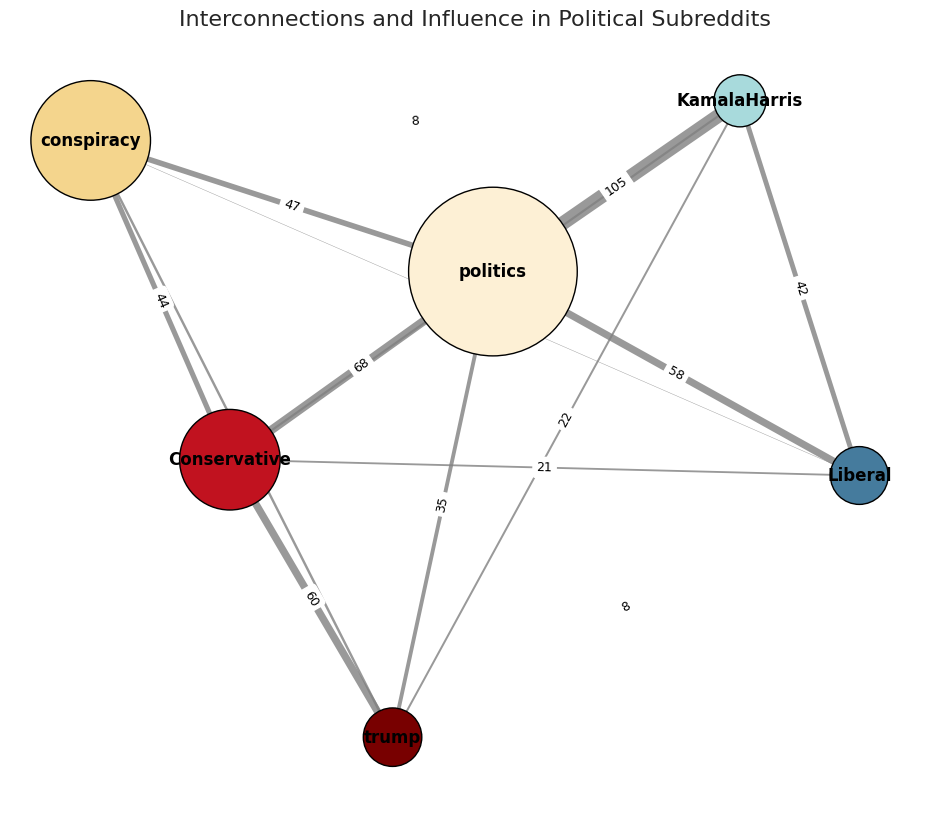

In [ ]:
political_subreddits = ["politics", "KamalaHarris", "trump", "Conservative", "Liberal", "conspiracy"]
edge_list = pd.read_csv("edge_list.csv")

nx_graph = nx.Graph()

# Optional (size of subreddit) and scaling of nodes
subreddit_size = {
    "politics": 8700000,
    "KamalaHarris": 79000,
    "trump": 126000,
    "Conservative": 1100000,
    "Liberal": 120000,
    "conspiracy": 2200000
}
node_sizes = [int(subreddit_size[sub] ** 0.5 * 5) for sub in political_subreddits]

# Add nodes
colors = ["#FDF0D5","#A8DADC", "#780000", "#C1121F", "#457B9D", '#F4D58D']
for i, sub in enumerate(political_subreddits):
    nx_graph.add_node(sub, size=node_sizes[i], color=colors[i])

# Add edges
for sub1, sub2, weight in zip(edge_list["Subreddit1"], edge_list["Subreddit2"], edge_list["Weight"]):
    nx_graph.add_edge(sub1, sub2, weight=weight)

# Normalize edge widths for better visualization
edge_weights = [nx_graph[u][v]['weight'] for u, v in nx_graph.edges()]
norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_widths = [norm(weight) * 10 for weight in edge_weights]  # Adjust thickness multiplier as needed
pos = nx.spring_layout(nx_graph, seed=42)
edge_labels = {(u, v): f"{nx_graph[u][v]['weight']}" for u, v in nx_graph.edges()}

# Plotting
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(nx_graph, pos, width=edge_widths, edge_color="grey", alpha=0.8)
nx.draw_networkx_nodes(nx_graph, pos, node_size=[nx_graph.nodes[n]["size"] for n in nx_graph.nodes()],
                       node_color=[nx_graph.nodes[n]['color'] for n in nx_graph.nodes()], edgecolors='black')
nx.draw_networkx_labels(nx_graph, pos, font_size=12, font_weight="bold", font_color="black")
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=9, font_color="black")

# Plot
plt.title("Interconnections and Influence in Political Subreddits", fontsize=16)
plt.axis("off")
plt.savefig('information_bubble.png')
plt.show()